In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables


Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find columns (tobs, station, prcp, id, date)

session.query(measurement).first().__dict__

# Calculate the date 1 year ago from the last data point in the database
for row in session.query(measurement.date).order_by(measurement.date.desc()).first():
     print(row)


# Perform a query to retrieve the data and precipitation scores

data_query = session.query(measurement.date, measurement.prcp).filter(measurement.date>='2016-08-23',measurement.date<'2017-08-23')


# for row in data_query.all():
#     print(row)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df =pd.DataFrame(data_query, columns =['Date','Precipitation Score'])

# Sort the dataframe by date

precipitation_df = precipitation_df.set_index('Date').sort_values('Date')

precipitation_df

2017-08-23


,Precipitation Score
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-21,0.02
2017-08-21,0.00
2017-08-22,0.00


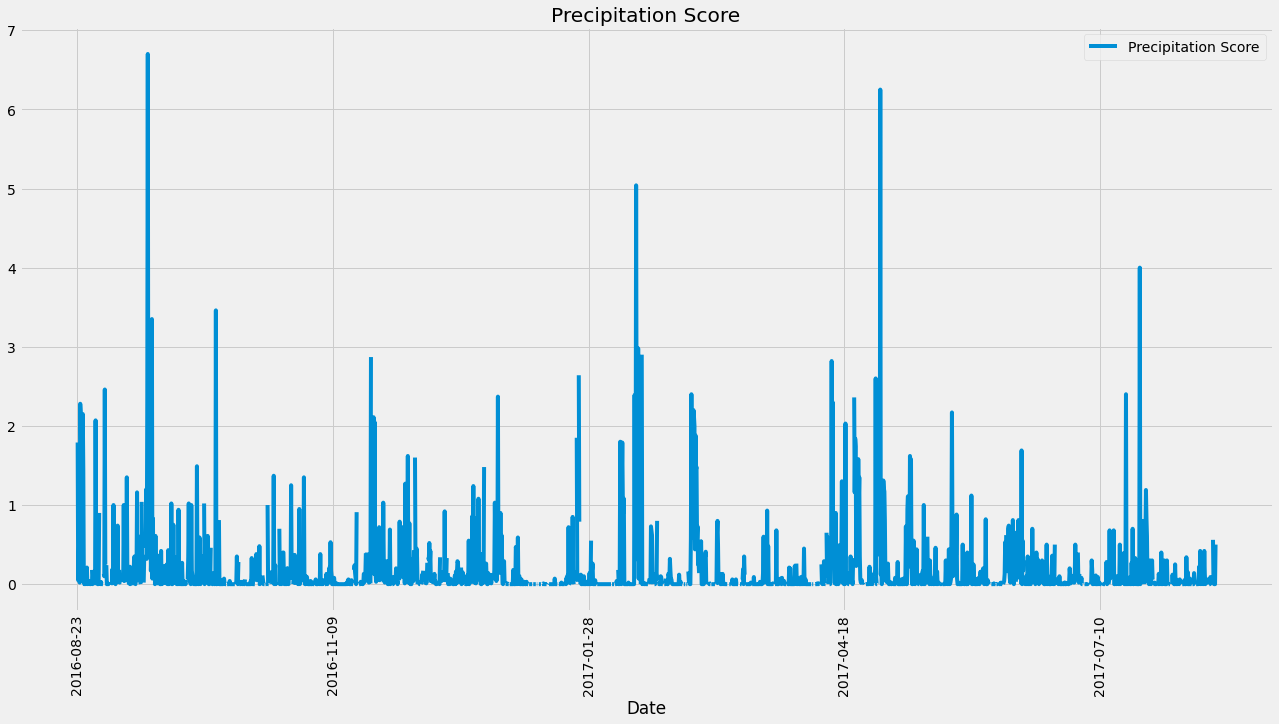

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(title='Precipitation Score',rot=90,figsize=(20,10))


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data

total_precip = precipitation_df.groupby('Date').sum()

average_precip = precipitation_df.groupby('Date').mean()

median_precip = precipitation_df.groupby('Date').median()

total_precip['Average Precipitation Score'] = average_precip['Precipitation Score']

total_precip['Median Precipitation Score'] = median_precip['Precipitation Score']

total_precip = total_precip.rename(columns={'Precipitation Score':'Total Precipitation Score'})

total_precip

,Total Precipitation Score,Average Precipitation Score,Median Precipitation Score
Date,,,
2016-08-23,2.71,0.451667,0.100
2016-08-24,9.33,1.555000,1.800
2016-08-25,0.54,0.077143,0.080
2016-08-26,0.10,0.016667,0.015
2016-08-27,0.32,0.064000,0.020
...,...,...,...
2017-08-18,0.06,0.020000,0.000
2017-08-19,0.09,0.030000,0.000
2017-08-20,0.01,0.005000,0.005


In [26]:
# Design a query to show how many stations are available in this dataset?

session.query(func.count(measurement.station.distinct())).all()


[(9)]

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = pd.DataFrame(session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).all(),columns = ['Station','Counts'])

station_activity = station_activity.sort_values('Counts',ascending=False)

station_activity

,Station,Counts
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Highest Temp for most active station
session.query(measurement.station,func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[('USC00519281', 85.0)]

In [39]:
#Lowest Temp for most active station
session.query(measurement.station,func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[('USC00519281', 54.0)]

In [40]:
#Average Temp for most active station
session.query(measurement.station,func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[('USC00519281', 71.66378066378067)]

In [43]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = pd.DataFrame(session.query(measurement.date,measurement.tobs).filter(measurement.station=='USC00519281').\
filter(measurement.date>='2016-08-23',measurement.date<'2017-08-23'), columns = ['Date','TOBS'])

most_active_tobs


,Date,TOBS
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0.5, 0, 'Temperature')

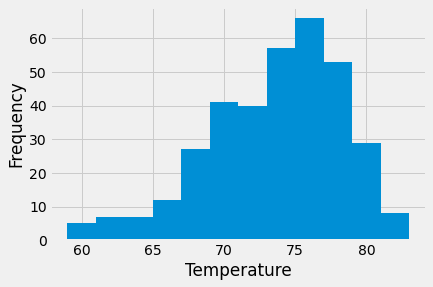

In [64]:
# Plot DF (matplotlib)

plt.hist(most_active_tobs['TOBS'],bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')



## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
